<a href="https://colab.research.google.com/github/AidaCPL/BC_Modeling-Sensitivity/blob/main/DHPP_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/drive/MyDrive/Modelin and Sensitivity_Bass Connections/Copia de DHPP_2.xlsx'
data = pd.read_excel(file_path)
data = data.drop(columns=['Unnamed: 14','Unnamed: 15', 'Unnamed: 16','Unnamed: 17'])
data

,Name,Status,City,Province,Reference Unit Power [MW],Average Lifetime Load Factor (%),Predicted Average Load factor (3% increase),Predicted Average Load factor (5% increase),Construction start date,First grid Connection,Heating Days (by province),Heating Days (by city),DHPP,Unnamed: 13
0,FUQING-4,Operational,Fuqing,Fujian,1000,80.000000,82.400000,84.000000,2012-11-17 00:00:00,2017-07-29,129.265152,NaN,45331.34098,NaN
1,FUQING-3,Operational,Fuqing,Fujian,1000,82.800000,85.284000,86.940000,2010-12-31 00:00:00,2016-09-07,129.265152,NaN,46917.93791,NaN
2,FUQING-5,Operational,Fuqing,Fujian,1075,83.100000,85.593000,87.255000,2015-05-07 00:00:00,2020-11-27,129.265152,NaN,50619.52522,NaN
3,FUQING-6,Operational,Fuqing,Fujian,1075,84.100000,86.623000,88.305000,2015-12-22 00:00:00,2022-01-01,129.265152,NaN,51228.66512,NaN
4,FUQING-1,Operational,Fuqing,Fujian,1000,85.000000,87.550000,89.250000,2008-11-21 00:00:00,2014-08-20,129.265152,NaN,48164.54979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,SANAO-2,Under Construction,Wenzhou,Zhejiang,1117,88.154545,90.799182,92.562273,2021-12-30 00:00:00,NaT,144.043388,139.772727,62175.36300,NaN
155,Cangnan San'ao nuclear power plant 2-3,pre-construction,Xiaguan,Zhejiang,1150,88.154545,90.799182,92.562273,NaN,NaT,144.043388,NaN,64012.23585,NaN
156,Cangnan San'ao nuclear power plant 2-4,pre-construction,Xiaguan,Zhejiang,1150,88.154545,90.799182,92.562273,NaN,NaT,144.043388,NaN,64012.23585,NaN
157,Cangnan San'ao nuclear power plant 3-5,announced,Xiaguan,Zhejiang,1150,88.154545,90.799182,92.562273,NaN,NaT,144.043388,NaN,64012.23585,NaN


In [ ]:
# Adding DHPP by Province for each scenario

# 2024: Only "Operating"
dhpp_2024 = data[data['Status'] == 'Operational'].groupby('Province')['DHPP'].sum().reset_index()
dhpp_2024.rename(columns={'DHPP': 'DHPP_2024'}, inplace=True)

In [ ]:
# 2030: "Operating" + "Under Construction"
dhpp_2030 = data[data['Status'].isin(['Operational', 'Under Construction'])].groupby('Province')['DHPP'].sum().reset_index()
dhpp_2030.rename(columns={'DHPP': 'DHPP_2030'}, inplace=True)

# 2050: "Operating" + "Under Construction" + "Announced" + "Preconstruction"
dhpp_2050 = data[data['Status'].isin(['Operational', 'Under Construction', 'announced', 'pre-construction'])].groupby('Province')['DHPP'].sum().reset_index()
dhpp_2050.rename(columns={'DHPP': 'DHPP_2050'}, inplace=True)

In [ ]:
# Merge all scenarios into a single DataFrame for comparison
dhpp_summary = dhpp_2024.merge(dhpp_2030, on='Province', how='outer').merge(dhpp_2050, on='Province', how='outer')

# Display the result
dhpp_summary

,Province,DHPP_2024,DHPP_2030,DHPP_2050
0,Fujian,494278.209320,836654.834860,1.371969e+06
1,Guangdong,477748.436840,701247.602650,1.267027e+06
2,Guangxi,175017.445290,175017.445290,6.155650e+05
3,Hainan,11520.268943,31647.194716,3.164719e+04
4,Hebei,NaN,NaN,4.076797e+05
5,Jiangsu,349662.497420,480943.819200,4.809438e+05
6,Liaoning,323339.257360,546822.250200,1.087753e+06
7,Shandong,149051.441915,361816.542325,1.343934e+06
8,Zhejiang,471683.199710,717053.986850,1.373875e+06


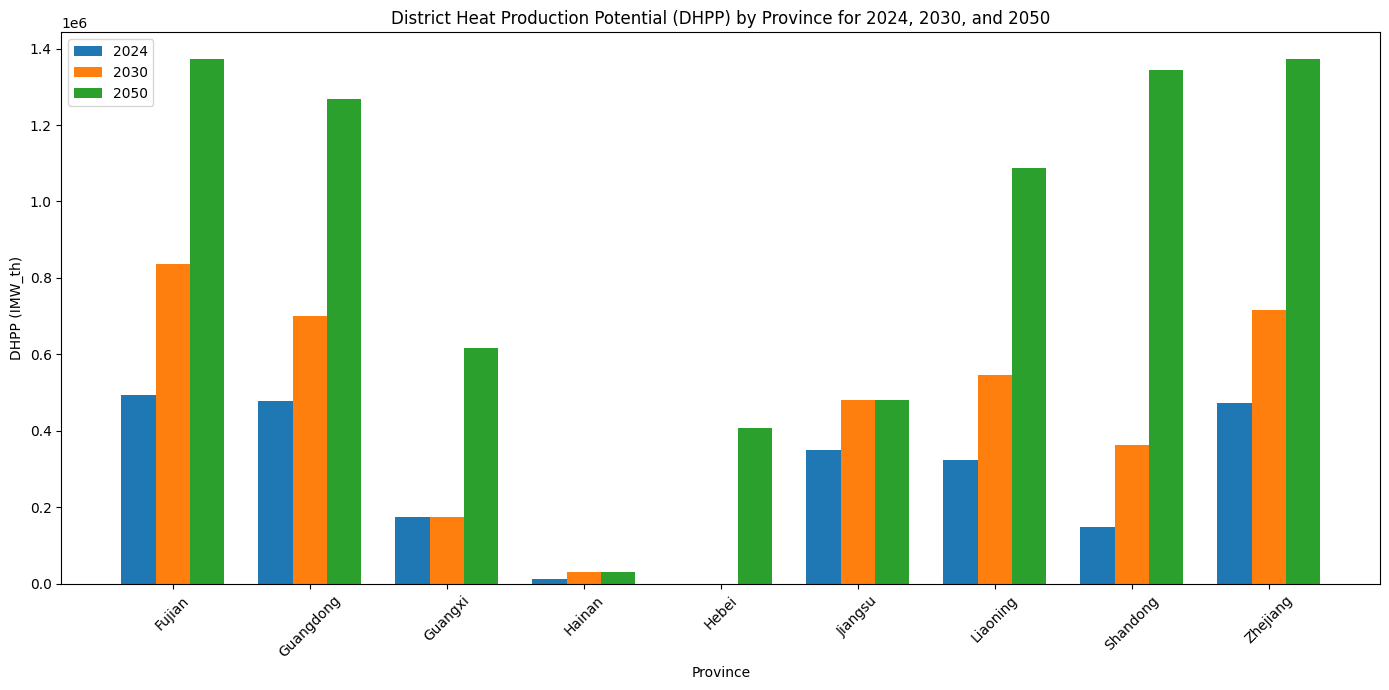

In [ ]:
import matplotlib.pyplot as plt

# Plotting the DHPP by province for 2024, 2030, and 2050
plt.figure(figsize=(14, 7))

# Bar width for the plot
bar_width = 0.25
index = range(len(dhpp_summary['Province']))

# Creating bars for 2024, 2030, and 2050
plt.bar(index, dhpp_summary['DHPP_2024'], bar_width, label='2024', align='center')
plt.bar([i + bar_width for i in index], dhpp_summary['DHPP_2030'], bar_width, label='2030', align='center')
plt.bar([i + 2 * bar_width for i in index], dhpp_summary['DHPP_2050'], bar_width, label='2050', align='center')

# Adding labels and title
plt.xlabel('Province')
plt.ylabel('DHPP (IMW_th)')
plt.title('District Heat Production Potential (DHPP) by Province for 2024, 2030, and 2050')
plt.xticks([i + bar_width for i in index], dhpp_summary['Province'], rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
pip install geopandas

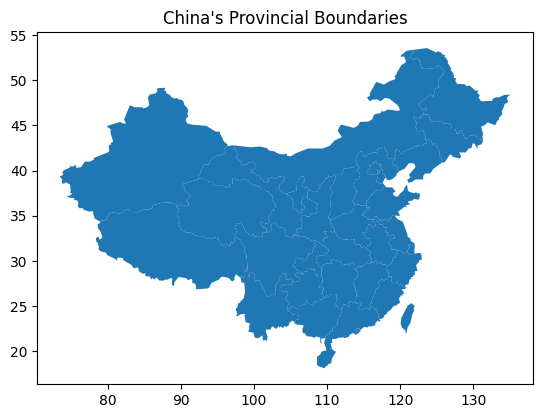

In [ ]:
import geopandas as gpd

china_map1 = gpd.read_file('/content/drive/MyDrive/Modelin and Sensitivity_Bass Connections/china.json')

# Plot the boundary data
china_map1.plot()
plt.title("China's Provincial Boundaries")
plt.show()


In [ ]:
# Display the first few rows to inspect the data
print(china_map1.head())

   id size      name  childNum  \
0  65  550  新疆维吾尔自治区        18   
1  54  550     西藏自治区         7   
2  15  450    内蒙古自治区        12   
3  63  800       青海省         8   
4  51  900       四川省        21   

                                            geometry  
0  POLYGON ((96.416 42.7588, 96.416 42.7148, 95.9...  
1  POLYGON ((79.0137 34.3213, 79.1016 34.4531, 79...  
2  POLYGON ((97.207 42.8027, 99.4922 42.583, 100....  
3  POLYGON ((89.7363 36.0791, 89.9121 36.0791, 90...  
4  POLYGON ((101.7773 33.5303, 101.8652 33.5742, ...  


In [ ]:
# Dictionary for Chinese to English province name translation
province_translation = {
    "北京市": "Beijing",
    "天津市": "Tianjin",
    "上海市": "Shanghai",
    "重庆市": "Chongqing",
    "河北省": "Hebei",
    "山西省": "Shanxi",
    "辽宁省": "Liaoning",
    "吉林省": "Jilin",
    "黑龙江省": "Heilongjiang",
    "江苏省": "Jiangsu",
    "浙江省": "Zhejiang",
    "安徽省": "Anhui",
    "福建省": "Fujian",
    "江西省": "Jiangxi",
    "山东省": "Shandong",
    "河南省": "Henan",
    "湖北省": "Hubei",
    "湖南省": "Hunan",
    "广东省": "Guangdong",
    "海南省": "Hainan",
    "四川省": "Sichuan",
    "贵州省": "Guizhou",
    "云南省": "Yunnan",
    "陕西省": "Shaanxi",
    "甘肃省": "Gansu",
    "青海省": "Qinghai",
    "台湾省": "Taiwan",
    "内蒙古自治区": "Inner Mongolia",
    "广西壮族自治区": "Guangxi",
    "西藏自治区": "Tibet",
    "宁夏回族自治区": "Ningxia",
    "新疆维吾尔自治区": "Xinjiang",
    "香港特别行政区": "Hong Kong",
    "澳门特别行政区": "Macau"}

# Translate the province names in the 'name' column
china_map1['name_english'] = china_map1['name'].replace(province_translation)

# Display the first few rows to check translations
print(china_map1[['name', 'name_english']].head())


       name    name_english
0  新疆维吾尔自治区        Xinjiang
1     西藏自治区           Tibet
2    内蒙古自治区  Inner Mongolia
3       青海省         Qinghai
4       四川省         Sichuan


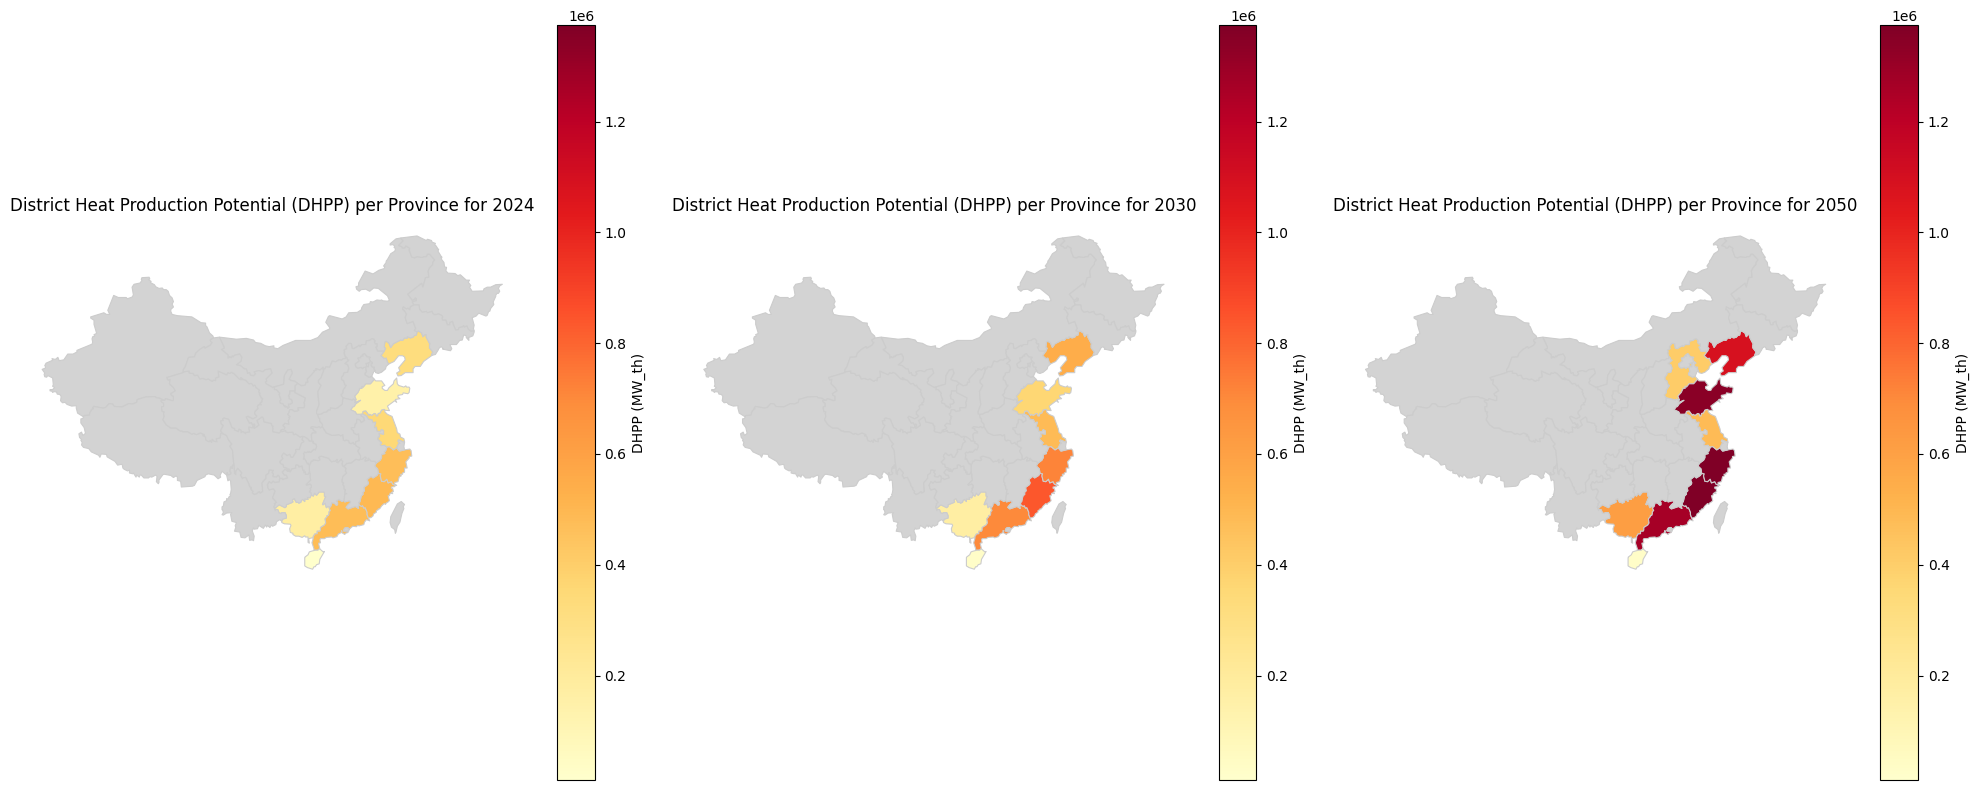

In [ ]:
# Merge the DHPP data with the GeoDataFrame, using 'name_english' as the province name column translated to english
china_map = china_map1.merge(dhpp_summary, left_on='name_english', right_on='Province', how='left')

# Define a common color map for consistent comparison
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
color_map = 'YlOrRd'

# Calculate the minimum and maximum values across multiple columns in the dhpp_summary df
vmin, vmax = dhpp_summary[['DHPP_2024', 'DHPP_2030', 'DHPP_2050']].min().min(), dhpp_summary[['DHPP_2024', 'DHPP_2030', 'DHPP_2050']].max().max()

# Plotting the heat maps for DHPP in 2024, 2030, and 2050
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Heat map for DHPP in 2024 with units in the legend
china_map.plot(
    column='DHPP_2024', cmap=color_map, linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True,
    vmin=vmin, vmax=vmax, missing_kwds={'color': 'lightgray', 'label': 'No Data'}, #map the rest of China's map
    legend_kwds={'label': "DHPP (MW_th)"}
)
ax[0].set_title('District Heat Production Potential (DHPP) per Province for 2024')
ax[0].axis('off')

# Heat map for DHPP in 2030 with units in the legend
china_map.plot(
    column='DHPP_2030', cmap=color_map, linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True,
    vmin=vmin, vmax=vmax, missing_kwds={'color': 'lightgray', 'label': 'No Data'},
    legend_kwds={'label': "DHPP (MW_th)"}
)
ax[1].set_title('District Heat Production Potential (DHPP) per Province for 2030')
ax[1].axis('off')

# Heat map for DHPP in 2050 with units in the legend
china_map.plot(
    column='DHPP_2050', cmap=color_map, linewidth=0.8, ax=ax[2], edgecolor='0.8', legend=True,
    vmin=vmin, vmax=vmax, missing_kwds={'color': 'lightgray', 'label': 'No Data'},
    legend_kwds={'label': "DHPP (MW_th)"}
)
ax[2].set_title('District Heat Production Potential (DHPP) per Province for 2050')
ax[2].axis('off')

# Display the maps
plt.tight_layout()
plt.show()
